In [176]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time
np.random.seed(0)
kMaxSteps = 50
kNumFeatures = 40
kMapSize = 25
obstacles = np.random.rand(2,kNumFeatures)*kMapSize
kInfluenceRadius = 5
kGoal = 1
kObjects = 1

k = 31


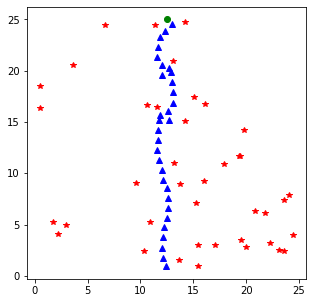

In [177]:
k = 0
xStart = np.array([kMapSize/2, 0]).reshape(2,-1)
xGoal = np.array([kMapSize/2,kMapSize]).reshape(2,-1)
xRobot = xStart
GoalError =  xGoal - xRobot;
robot_xy = np.array(xRobot)
robot_th = np.array(0)
plt.figure(figsize=(5,5))

while (np.linalg.norm(GoalError)>1 and k < kMaxSteps):
    relative_positions = obstacles - np.tile(xRobot,(1,kNumFeatures))
    distances = np.sqrt(np.sum(np.square(relative_positions),axis=0))
    idx_proximal = distances < kInfluenceRadius
    if(any(idx_proximal)):
        rho = np.tile(distances[idx_proximal],(2,1))
        V = relative_positions[:,idx_proximal]
        DrhoDx = -V/rho
        F = (1/rho-1/kInfluenceRadius)*1/(np.square(rho))*DrhoDx
        FObjects = kObjects*np.sum(F,axis=1).reshape(-1,1)
    else:
        FObjects = np.array([0,0]).reshape(-1,1)
    FGoal = kGoal*(GoalError)/np.linalg.norm(GoalError);
    FTotal = FGoal+FObjects;
    FTotal = FTotal/np.linalg.norm(FTotal)*min(1,np.linalg.norm(FTotal))
    thetaRobot = math.atan2(FTotal[1],FTotal[0])
    xRobot = xRobot+FTotal;
    robot_xy=np.append(robot_xy,xRobot,axis=1)
    robot_th=np.append(robot_th,thetaRobot)
    plt.plot(xRobot[0],xRobot[1],'b^')
    GoalError = xGoal - xRobot
    k += 1
plt.plot(obstacles[0,:],obstacles[1,:],'r*');
plt.plot(xGoal[0],xGoal[1],'go')
print("k =",k)

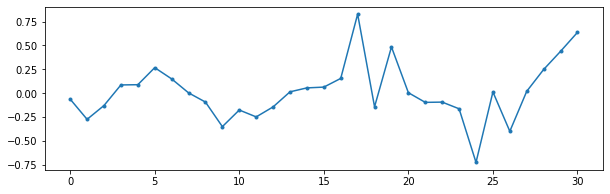

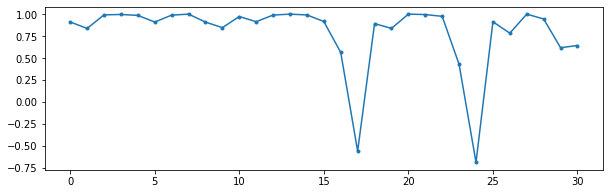

In [178]:
plt.figure(figsize=(10,3))
plt.plot(np.diff(robot_xy[0]),'.-')
plt.figure(figsize=(10,3))
plt.plot(np.diff(robot_xy[1]),'.-')

In [179]:
T_robot_world = np.identity(3)
th = np.pi/2 # facing upwards
T_robot_world[0,0] = np.cos(th)
T_robot_world[0,1] = -np.sin(th)
T_robot_world[1,0] = np.sin(th)
T_robot_world[1,1] = np.cos(th)
T_robot_world[0,2] = xStart[0]
T_robot_world[1,2] = xStart[1]
robot_global_poses = [T_robot_world]
relative_poses = []

for i in range(1,robot_xy.shape[1]):
    T_i = np.identity(3)
    th = robot_th[i]
    T_i[0,0] = np.cos(th)
    T_i[0,1] = -np.sin(th)
    T_i[1,0] = np.sin(th)
    T_i[1,1] = np.cos(th)
    T_i[0,2] = robot_xy[:,i][0]
    T_i[1,2] = robot_xy[:,i][1]
    robot_global_poses.append(T_i)

for i in range(1,len(robot_global_poses)):
    T_rel_pose = np.matmul(np.linalg.inv(robot_global_poses[i-1]),robot_global_poses[i])
    relative_poses.append(T_rel_pose)
relative_poses[0]

array([[ 0.99762811, -0.06883427,  0.91071676],
       [ 0.06883427,  0.99762811,  0.06283757],
       [ 0.        ,  0.        ,  1.        ]])

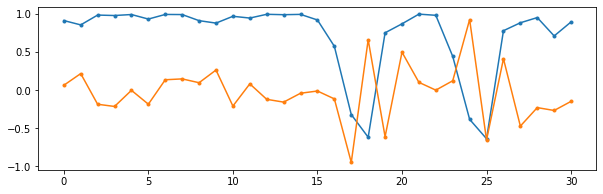

In [180]:
dx = []
dy = []
for i in range(len(relative_poses)):
    dx.append(relative_poses[i][0,2])
    dy.append(relative_poses[i][1,2])
plt.figure(figsize=(10,3))
# plt.plot(np.diff(robot_xy[0]),'.-')
plt.plot(dx,'.-')
plt.plot(dy,'.-')